In [ ]:
#Supermart Grocery Sales -Machine Learning Project

In [198]:
import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
Load a dataset 

In [199]:
data=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.Csv')

In [200]:
data.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [201]:
#Display the first few rows of the Dataset
 
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [234]:
#Data Processing
# 1.Check for missing values and Handles them

print(data.isnull().sum())

Order ID            0
Customer Name       0
Category            0
Sub Category        0
City                0
Order Date       5952
Region              0
Sales               0
Discount            0
Profit              0
State               0
Order Day        5952
Order Month      5952
Order Year       5952
dtype: int64


In [235]:
#Drop any rows with missing values 
data.dropna(inplace=True)

In [236]:
# Check for duplicates 
data.drop_duplicates(inplace=True)

In [237]:
#2.Convert Data Columns to DateTime Format
#Convert 'Order Date' to datetime Format
data['Order Date']=pd.to_datetime(data['Order Date'], errors='coerce')  #errors=coerce will controls what pandas should do if it finds a value that cannot be converted to datet
print(data['Order Date'])


0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9983   2017-12-06
9986   2018-05-08
9988   2016-11-03
9990   2015-07-12
9991   2017-06-06
Name: Order Date, Length: 4042, dtype: datetime64[ns]


In [238]:
#Extract day, month and year form 'Order Date'

data['Order Day']=data['Order Date'].dt.day
data['Order Month']=data['Order Date'].dt.month
data['Order Year']=data['Order Date'].dt.year

print(data['Order Day'])
print(data['Order Month'])
print(data['Order Year'])

0        8
1        8
2       12
3       11
4       11
        ..
9983     6
9986     8
9988     3
9990    12
9991     6
Name: Order Day, Length: 4042, dtype: int32
0       11
1       11
2        6
3       10
4       10
        ..
9983    12
9986     5
9988    11
9990     7
9991     6
Name: Order Month, Length: 4042, dtype: int32
0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9983    2017
9986    2018
9988    2016
9990    2015
9991    2017
Name: Order Year, Length: 4042, dtype: int32


In [239]:
#3.Label Encoding for Categorical Variables

#Convert categorical variables such as 'Category','Sub Category','City','Region','State' and 'Month to numerical values
#Initialize the label encoder

le=LabelEncoder()


data['Category']= le.fit_transform(data['Category'])
data['Sub Category']= le.fit_transform(data['Sub Category'])
data['City']= le.fit_transform(data['City'])
data['Region']= le.fit_transform(data['Region'])
data['State']= le.fit_transform(data['State'])#as per the dataset 'month' is not defined in columns so it gives error if we use error

print(data['Category'])
print(data['Sub Category'])
print(data['City'])
print(data['Region'])
print(data['State'])


0       5
1       1
2       3
3       4
4       3
       ..
9983    3
9986    0
9988    6
9990    0
9991    3
Name: Category, Length: 4042, dtype: int64
0       14
1       13
2        0
3       12
4       18
        ..
9983    20
9986     1
9988     6
9990     1
9991    20
Name: Sub Category, Length: 4042, dtype: int64
0       21
1        8
2       13
3        4
4       12
        ..
9983    10
9986    21
9988    21
9990     6
9991     0
Name: City, Length: 4042, dtype: int64
0       2
1       3
2       4
3       3
4       3
       ..
9983    4
9986    4
9988    4
9990    4
9991    4
Name: Region, Length: 4042, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
9983    0
9986    0
9988    0
9990    0
9991    0
Name: State, Length: 4042, dtype: int64


In [240]:
#Display the first few rows after encoding
print(data.head())  

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0          8           11        2017  
1    749      0.18  149.80      0          8           11        2017  
2   2360      0.21  165.20      0         12            6        2017  
3    896      0.25   89.60      0         11           10        2016  
4   2355      0.26  918.45      0         11           10        2016  


In [ ]:
#Exploratory Data Analysis(EDA)
1.Distribution of sales by Category
2.Sales Trends Over Time
3.Correlation Heatmap

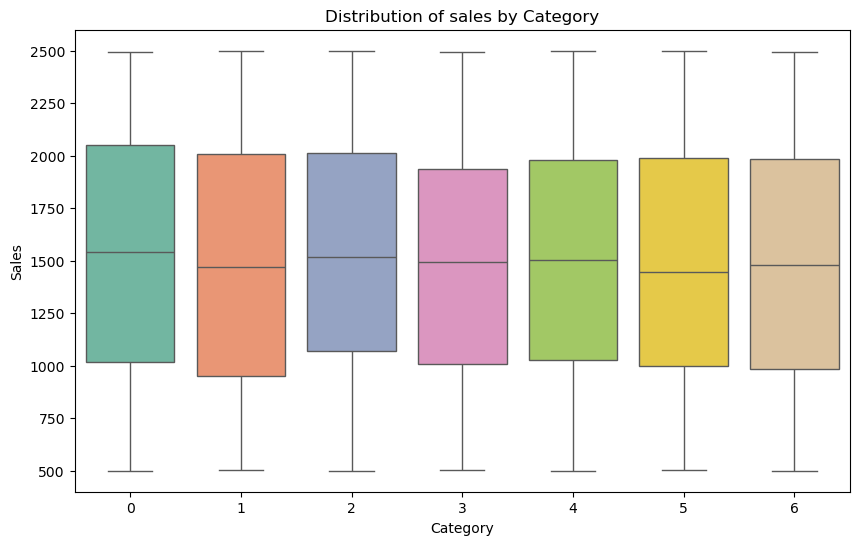

In [241]:
#1. Distribution of sales by Category

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Category',y='Sales',hue='Category',data=data,palette='Set2',legend=False)  #Here in this line we have to use 'hue' because seaborn doesn't accept without hue in new versions
#so we must follow with hue if we use palette
plt.title('Distribution of sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Observation :
As per the above boxplot there are no significant outliers across categories and the median sales values are around(1500) similar distribution and shows comparable central tendency among categories and interquartile ranges are also consistent.

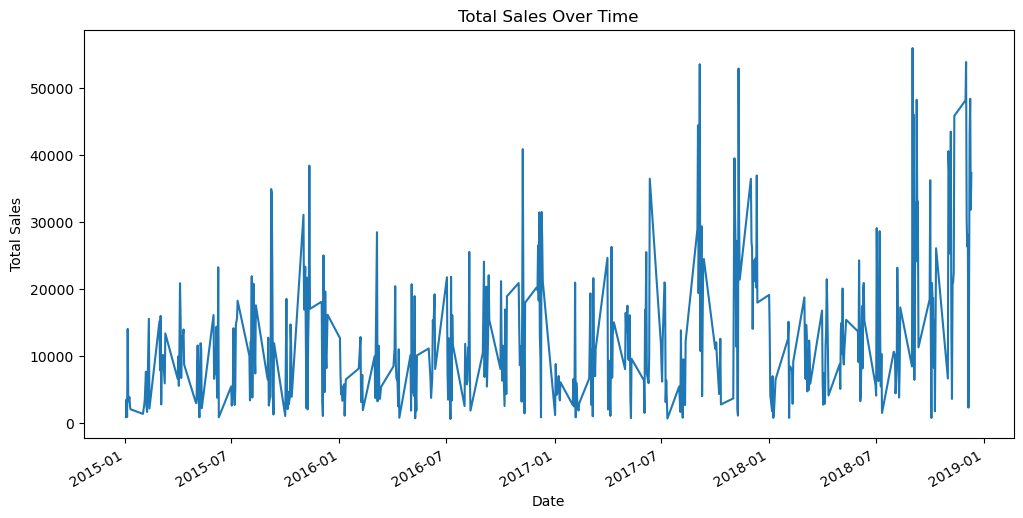

In [242]:
#2. Sales Trends over Time
plt.figure(figsize=(12,6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
#Observation :
As per the above Chart the yearly sales trend shows a consistent upward growth pattern and as the year progress total sales increasing as it reflects customer demand,effective and improved market over time.

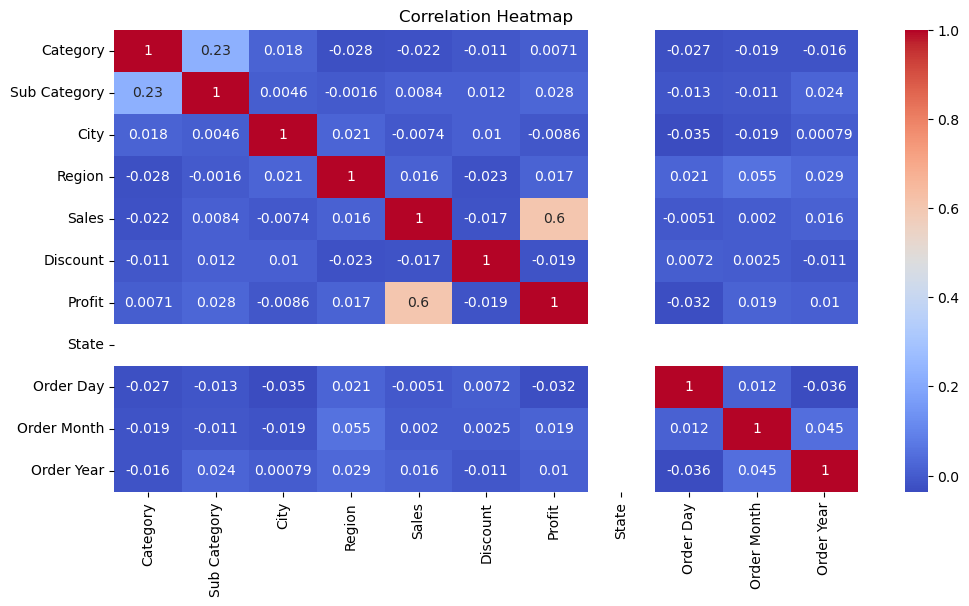

In [243]:
#3. Correlation Heatmap

plt.figure(figsize=(12,6))

corr_matrix=data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

In [244]:
data['Discount'].value_counts()

Discount
0.27    177
0.19    176
0.25    174
0.22    173
0.23    171
0.34    165
0.35    165
0.14    164
0.30    158
0.21    157
0.11    155
0.29    155
0.33    154
0.26    153
0.24    153
0.17    153
0.20    151
0.18    149
0.31    147
0.12    147
0.13    146
0.16    143
0.32    142
0.10    140
0.28    139
0.15    135
Name: count, dtype: int64

In [ ]:
#Observation :
Here based on the output the discounts exist(0.11-0.35)are actively applied but correlation is near to zero between discount and profit.
And sales vs profit is moderate positive that is (0.6) that means profit is mainly driven by sales, not Discount and it maintains non-linear relationship.

In [ ]:
#Feature Selection and Model Building
#we'll use features like Category, Sub Category,City, Region,State Discount and profit to predict to sales

In [250]:
# Select features and target variable

features=data.drop(columns=['Order ID','Customer Name','Order Date','Sales',])
target=data['Sales']            #Month is not defined in columns 

#one-hot encoding

print(features)
print(target)


      Category  Sub Category  City  Region  Discount  Profit  State  \
0            5            14    21       2      0.12  401.28      0   
1            1            13     8       3      0.18  149.80      0   
2            3             0    13       4      0.21  165.20      0   
3            4            12     4       3      0.25   89.60      0   
4            3            18    12       3      0.26  918.45      0   
...        ...           ...   ...     ...       ...     ...    ...   
9983         3            20    10       4      0.17  607.10      0   
9986         0             1    21       4      0.34  153.93      0   
9988         6             6    21       4      0.15  452.60      0   
9990         0             1     6       4      0.26   71.70      0   
9991         3            20     0       4      0.16  501.44      0   

      Order Day  Order Month  Order Year  
0             8           11        2017  
1             8           11        2017  
2            12   

In [252]:
# Split the data into training and testing sets 

x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
features=pd.get_dummies(features,drop_first=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3233, 10)
(809, 10)
(3233,)
(809,)


In [ ]:
#Observation output 
7995,1999 -Rows
7 -feature columns
1-Target Column

In [254]:
# Feature Scaling

Scaler=StandardScaler()

x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

print(x_train)
print(x_test)

[[ 9.81517537e-01  1.67715668e+00 -1.50475231e+00 ...  4.41045126e-01
   2.83505066e-04 -1.56776302e+00]
 [ 1.47928165e+00 -7.34338780e-01 -1.21793427e+00 ... -1.27449395e+00
  -1.52733629e+00  1.12781108e+00]
 [ 4.83753428e-01  9.23564346e-01 -9.31116229e-01 ... -1.56041712e+00
   1.22237934e+00 -6.69238316e-01]
 ...
 [ 9.81517537e-01  1.67715668e+00 -1.36134329e+00 ...  1.55121947e-01
   3.05807465e-01  1.12781108e+00]
 [-5.11774791e-01 -1.31464916e-01 -9.31116229e-01 ... -1.30801231e-01
   1.22237934e+00 -6.69238316e-01]
 [-5.11774791e-01  6.22127414e-01  6.46383006e-01 ... -1.30801231e-01
   3.05807465e-01 -6.69238316e-01]]
[[-1.50730301 -1.48793111 -1.21793427 ... -0.41672441 -1.22181233
  -0.66923832]
 [ 0.98151754  1.67715668  0.21615594 ... -1.56041712  0.30580746
  -0.66923832]
 [ 0.48375343  0.92356435  0.93320105 ...  0.44104513 -0.30524045
   0.22928638]
 ...
 [-0.51177479 -1.03577571 -1.64816134 ... -0.98857077  0.30580746
  -0.66923832]
 [-1.0095389   1.52643821  0.359564

In [255]:
# Train a Linear Regression Model 

In [256]:
#Intialize the model

from sklearn.linear_model import LinearRegression


model=LinearRegression()
#Train the model
model.fit(x_train,y_train)
#Make predictions
y_pred=model.predict(x_test)

In [257]:
# Evaluate the Model
#Evaluate the model performace using Mean Squared Error(MSE) and R-squared

In [258]:
#Calculate MSE and R-squared

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error:{mse}')
print(f'R-Squared:{r2}')

Mean Squared Error:211380.02160390798
R-Squared:0.36811830351190666


In [219]:
#Observation : The linear regression model explains approximately 37% of the variance in sales, indicating a moderate predictive capability. However, a significant portion of the variation remains unexplained, suggesting that the relationship between features and sales may not be purely linear. Further model refinement using more advanced algorithms may improve performance.

In [220]:
#Visualize the results

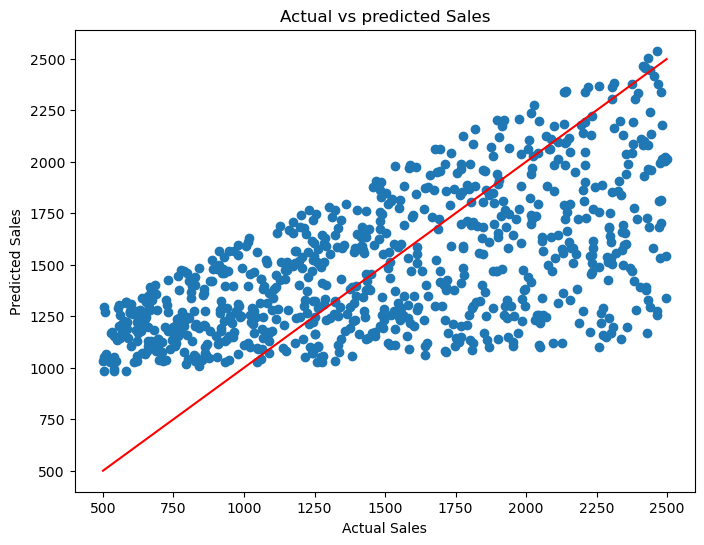

In [259]:
#1. Actual vs Predicted sales 
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs predicted Sales')
plt.show()


In [ ]:
#Observation:
The model captures the overall positive relationship between actual and predicted sales.However,there is noticeable dispersion around the ideal line,indicating prediction errors,The spread appears slightly wider at higher sales values.